## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
from tensorflow.python import keras
import matplotlib.pyplot as plt
%pylab inline
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Populating the interactive namespace from numpy and matplotlib


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="softmax")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
"""
Compile your model
"""
model = build_mlp()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
def fit(optimizer):
    model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=500, 
              batch_size=256, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    return model

def show_result(model):
    """
    Get the training loss / validation loss / training accuracy / validation accuracy and plot them
    """
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]

    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()

# Adam

In [7]:
optimizer = keras.optimizers.Adam(lr=0.001)
model_adam = fit(optimizer)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 49us/sample - loss: 2.1434 - acc: 0.1744 - val_loss: 2.0730 - val_acc: 0.2028
Epoch 2/500
50000/50000 [==============================] - 2s 39us/sample - loss: 2.0242 - acc: 0.2182 - val_loss: 1.9839 - val_acc: 0.2335
Epoch 3/500
50000/50000 [==============================] - 2s 40us/sample - loss: 1.9281 - acc: 0.2764 - val_loss: 1.8317 - val_acc: 0.3330
Epoch 4/500
50000/50000 [==============================] - 2s 40us/sample - loss: 1.7885 - acc: 0.3471 - val_loss: 1.7351 - val_acc: 0.3673
Epoch 5/500
50000/50000 [==============================] - 2s 40us/sample - loss: 1.6941 - acc: 0.3890 - val_loss: 1.6664 - val_acc: 0.3952
Epoch 6/500
50000/50000 [==============================] - 2s 39us/sample - loss: 1.6306 - acc: 0.4156 - val_loss: 1.6028 - val_acc: 0.4259
Epoch 7/500
50000/50000 [==============================] - 2s 41us/sample - loss: 1.5844 - acc: 0.4318 - val_l

Epoch 59/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.9891 - acc: 0.6521 - val_loss: 1.5250 - val_acc: 0.5039
Epoch 60/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.9914 - acc: 0.6500 - val_loss: 1.5597 - val_acc: 0.4975
Epoch 61/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.9815 - acc: 0.6562 - val_loss: 1.5227 - val_acc: 0.5088
Epoch 62/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.9812 - acc: 0.6560 - val_loss: 1.5035 - val_acc: 0.5047
Epoch 63/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.9662 - acc: 0.6603 - val_loss: 1.5231 - val_acc: 0.5083
Epoch 64/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.9737 - acc: 0.6595 - val_loss: 1.5217 - val_acc: 0.5082
Epoch 65/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.9567 - acc: 0.6657 - val_loss: 1.5343 - val_acc: 0.5043
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.7195 - acc: 0.7483 - val_loss: 1.9685 - val_acc: 0.4928
Epoch 118/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.7187 - acc: 0.7487 - val_loss: 1.9309 - val_acc: 0.4915
Epoch 119/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.7275 - acc: 0.7437 - val_loss: 2.0173 - val_acc: 0.4927
Epoch 120/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.7023 - acc: 0.7521 - val_loss: 1.9725 - val_acc: 0.4950
Epoch 121/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.7078 - acc: 0.7530 - val_loss: 2.0125 - val_acc: 0.4850
Epoch 122/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.6984 - acc: 0.7557 - val_loss: 2.0579 - val_acc: 0.4843
Epoch 123/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.6885 - acc: 0.7619 - val_loss: 1.9944 - val_acc: 0.4944
Epoch 

Epoch 175/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.5568 - acc: 0.8054 - val_loss: 2.4568 - val_acc: 0.4865
Epoch 176/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.5552 - acc: 0.8078 - val_loss: 2.5935 - val_acc: 0.4832
Epoch 177/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.5499 - acc: 0.8093 - val_loss: 2.4341 - val_acc: 0.4900
Epoch 178/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.5609 - acc: 0.8031 - val_loss: 2.5183 - val_acc: 0.4880
Epoch 179/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.5398 - acc: 0.8123 - val_loss: 2.4758 - val_acc: 0.4874
Epoch 180/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.5726 - acc: 0.8000 - val_loss: 2.4818 - val_acc: 0.4956
Epoch 181/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.5384 - acc: 0.8124 - val_loss: 2.5168 - val_acc: 0.4865
Epoch 

Epoch 233/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.4360 - acc: 0.8497 - val_loss: 2.8992 - val_acc: 0.4766
Epoch 234/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.4568 - acc: 0.8409 - val_loss: 2.9242 - val_acc: 0.4809
Epoch 235/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.4480 - acc: 0.8450 - val_loss: 3.0792 - val_acc: 0.4804
Epoch 236/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.4385 - acc: 0.8492 - val_loss: 3.0671 - val_acc: 0.4780
Epoch 237/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.4349 - acc: 0.8492 - val_loss: 2.9335 - val_acc: 0.4781
Epoch 238/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.4720 - acc: 0.8367 - val_loss: 2.9443 - val_acc: 0.4758
Epoch 239/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.4540 - acc: 0.8442 - val_loss: 3.0518 - val_acc: 0.4782
Epoch 

Epoch 291/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.3847 - acc: 0.8669 - val_loss: 3.4698 - val_acc: 0.4679
Epoch 292/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.3815 - acc: 0.8699 - val_loss: 3.4961 - val_acc: 0.4713
Epoch 293/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.3771 - acc: 0.8714 - val_loss: 3.3571 - val_acc: 0.4694
Epoch 294/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.3934 - acc: 0.8637 - val_loss: 3.4436 - val_acc: 0.4797
Epoch 295/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.3577 - acc: 0.8778 - val_loss: 3.4951 - val_acc: 0.4746
Epoch 296/500
50000/50000 [==============================] - 2s 39us/sample - loss: 0.3427 - acc: 0.8838 - val_loss: 3.5848 - val_acc: 0.4670
Epoch 297/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.3773 - acc: 0.8704 - val_loss: 3.5766 - val_acc: 0.4704
Epoch 

Epoch 349/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.3620 - acc: 0.8752 - val_loss: 3.8425 - val_acc: 0.4711
Epoch 350/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.3214 - acc: 0.8912 - val_loss: 3.7817 - val_acc: 0.4717
Epoch 351/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.2833 - acc: 0.9044 - val_loss: 3.8276 - val_acc: 0.4741
Epoch 352/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.3102 - acc: 0.8962 - val_loss: 3.9300 - val_acc: 0.4641
Epoch 353/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.3599 - acc: 0.8793 - val_loss: 3.6743 - val_acc: 0.4676
Epoch 354/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.3618 - acc: 0.8783 - val_loss: 3.7840 - val_acc: 0.4694
Epoch 355/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.3100 - acc: 0.8949 - val_loss: 3.8202 - val_acc: 0.4715
Epoch 

Epoch 407/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.2486 - acc: 0.9173 - val_loss: 4.2395 - val_acc: 0.4678
Epoch 408/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.2291 - acc: 0.9245 - val_loss: 4.0796 - val_acc: 0.4672
Epoch 409/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.2626 - acc: 0.9120 - val_loss: 4.2091 - val_acc: 0.4691
Epoch 410/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.4067 - acc: 0.8664 - val_loss: 3.7209 - val_acc: 0.4619
Epoch 411/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.3105 - acc: 0.8947 - val_loss: 4.0137 - val_acc: 0.4685
Epoch 412/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.2623 - acc: 0.9124 - val_loss: 4.0548 - val_acc: 0.4709
Epoch 413/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.2397 - acc: 0.9210 - val_loss: 4.2021 - val_acc: 0.4683
Epoch 

Epoch 465/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.2837 - acc: 0.9031 - val_loss: 4.3750 - val_acc: 0.4615
Epoch 466/500
50000/50000 [==============================] - 2s 39us/sample - loss: 0.2499 - acc: 0.9154 - val_loss: 4.5534 - val_acc: 0.4600
Epoch 467/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.2773 - acc: 0.9049 - val_loss: 4.4141 - val_acc: 0.4657
Epoch 468/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.2770 - acc: 0.9065 - val_loss: 4.2766 - val_acc: 0.4659
Epoch 469/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.2237 - acc: 0.9245 - val_loss: 4.4629 - val_acc: 0.4658
Epoch 470/500
50000/50000 [==============================] - 2s 41us/sample - loss: 0.2911 - acc: 0.9013 - val_loss: 4.3262 - val_acc: 0.4607
Epoch 471/500
50000/50000 [==============================] - 2s 40us/sample - loss: 0.2731 - acc: 0.9081 - val_loss: 4.2708 - val_acc: 0.4638
Epoch 

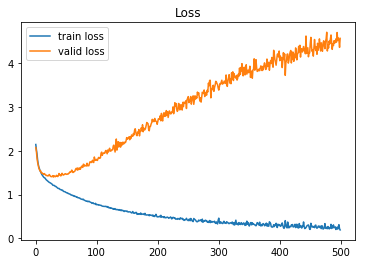

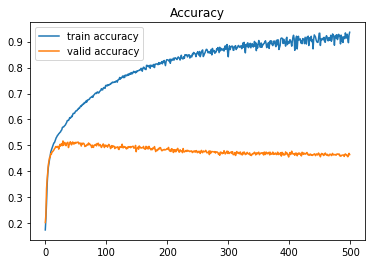

In [8]:
show_result(model_adam)

# SGD

In [9]:
optimizer = keras.optimizers.SGD(lr=0.001)
model_sgd = fit(optimizer)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 38us/sample - loss: 0.1476 - acc: 0.9566 - val_loss: 4.5557 - val_acc: 0.4687
Epoch 2/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1274 - acc: 0.9654 - val_loss: 4.5769 - val_acc: 0.4674
Epoch 3/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1226 - acc: 0.9676 - val_loss: 4.5836 - val_acc: 0.4681
Epoch 4/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1202 - acc: 0.9689 - val_loss: 4.5841 - val_acc: 0.4681
Epoch 5/500
50000/50000 [==============================] - 2s 34us/sample - loss: 0.1185 - acc: 0.9695 - val_loss: 4.5944 - val_acc: 0.4674
Epoch 6/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1173 - acc: 0.9700 - val_loss: 4.5953 - val_acc: 0.4678
Epoch 7/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1162 - acc: 0.9707 - val_l

Epoch 59/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1049 - acc: 0.9736 - val_loss: 4.6849 - val_acc: 0.4668
Epoch 60/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1048 - acc: 0.9735 - val_loss: 4.6919 - val_acc: 0.4668
Epoch 61/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1047 - acc: 0.9736 - val_loss: 4.6885 - val_acc: 0.4671
Epoch 62/500
50000/50000 [==============================] - 2s 34us/sample - loss: 0.1047 - acc: 0.9735 - val_loss: 4.6911 - val_acc: 0.4672
Epoch 63/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1046 - acc: 0.9736 - val_loss: 4.6918 - val_acc: 0.4676
Epoch 64/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1045 - acc: 0.9735 - val_loss: 4.6956 - val_acc: 0.4671
Epoch 65/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1044 - acc: 0.9737 - val_loss: 4.6883 - val_acc: 0.4671
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1012 - acc: 0.9744 - val_loss: 4.7404 - val_acc: 0.4678
Epoch 118/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1012 - acc: 0.9746 - val_loss: 4.7401 - val_acc: 0.4677
Epoch 119/500
50000/50000 [==============================] - 2s 32us/sample - loss: 0.1012 - acc: 0.9745 - val_loss: 4.7389 - val_acc: 0.4690
Epoch 120/500
50000/50000 [==============================] - 2s 34us/sample - loss: 0.1011 - acc: 0.9746 - val_loss: 4.7406 - val_acc: 0.4676
Epoch 121/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1011 - acc: 0.9747 - val_loss: 4.7414 - val_acc: 0.4681
Epoch 122/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1010 - acc: 0.9745 - val_loss: 4.7389 - val_acc: 0.4676
Epoch 123/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1010 - acc: 0.9746 - val_loss: 4.7416 - val_acc: 0.4677
Epoch 

Epoch 175/500
50000/50000 [==============================] - 2s 32us/sample - loss: 0.0989 - acc: 0.9753 - val_loss: 4.7733 - val_acc: 0.4672
Epoch 176/500
50000/50000 [==============================] - 2s 34us/sample - loss: 0.0988 - acc: 0.9752 - val_loss: 4.7735 - val_acc: 0.4671
Epoch 177/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0988 - acc: 0.9753 - val_loss: 4.7749 - val_acc: 0.4674
Epoch 178/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0988 - acc: 0.9753 - val_loss: 4.7769 - val_acc: 0.4669
Epoch 179/500
50000/50000 [==============================] - 2s 32us/sample - loss: 0.0987 - acc: 0.9754 - val_loss: 4.7677 - val_acc: 0.4663
Epoch 180/500
50000/50000 [==============================] - 2s 34us/sample - loss: 0.0987 - acc: 0.9754 - val_loss: 4.7781 - val_acc: 0.4667
Epoch 181/500
50000/50000 [==============================] - 2s 34us/sample - loss: 0.0987 - acc: 0.9754 - val_loss: 4.7749 - val_acc: 0.4675
Epoch 

Epoch 233/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0971 - acc: 0.9759 - val_loss: 4.7961 - val_acc: 0.4661
Epoch 234/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0970 - acc: 0.9758 - val_loss: 4.7985 - val_acc: 0.4662
Epoch 235/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0970 - acc: 0.9759 - val_loss: 4.7989 - val_acc: 0.4662
Epoch 236/500
50000/50000 [==============================] - 2s 34us/sample - loss: 0.0970 - acc: 0.9758 - val_loss: 4.7964 - val_acc: 0.4665
Epoch 237/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0970 - acc: 0.9759 - val_loss: 4.7998 - val_acc: 0.4659
Epoch 238/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0970 - acc: 0.9758 - val_loss: 4.7997 - val_acc: 0.4669
Epoch 239/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0969 - acc: 0.9759 - val_loss: 4.7982 - val_acc: 0.4665
Epoch 

Epoch 291/500
50000/50000 [==============================] - 2s 34us/sample - loss: 0.0956 - acc: 0.9763 - val_loss: 4.8156 - val_acc: 0.4659
Epoch 292/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0956 - acc: 0.9765 - val_loss: 4.8183 - val_acc: 0.4658
Epoch 293/500
50000/50000 [==============================] - 2s 34us/sample - loss: 0.0956 - acc: 0.9764 - val_loss: 4.8236 - val_acc: 0.4654
Epoch 294/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0956 - acc: 0.9763 - val_loss: 4.8235 - val_acc: 0.4658
Epoch 295/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0955 - acc: 0.9764 - val_loss: 4.8218 - val_acc: 0.4662
Epoch 296/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0955 - acc: 0.9765 - val_loss: 4.8198 - val_acc: 0.4658
Epoch 297/500
50000/50000 [==============================] - 2s 32us/sample - loss: 0.0955 - acc: 0.9764 - val_loss: 4.8228 - val_acc: 0.4660
Epoch 

Epoch 349/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0944 - acc: 0.9768 - val_loss: 4.8400 - val_acc: 0.4662
Epoch 350/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0944 - acc: 0.9769 - val_loss: 4.8450 - val_acc: 0.4654
Epoch 351/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0944 - acc: 0.9768 - val_loss: 4.8373 - val_acc: 0.4665
Epoch 352/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0944 - acc: 0.9767 - val_loss: 4.8376 - val_acc: 0.4664
Epoch 353/500
50000/50000 [==============================] - 2s 32us/sample - loss: 0.0943 - acc: 0.9769 - val_loss: 4.8394 - val_acc: 0.4657
Epoch 354/500
50000/50000 [==============================] - 2s 32us/sample - loss: 0.0943 - acc: 0.9769 - val_loss: 4.8411 - val_acc: 0.4662
Epoch 355/500
50000/50000 [==============================] - 2s 32us/sample - loss: 0.0943 - acc: 0.9769 - val_loss: 4.8404 - val_acc: 0.4654
Epoch 

Epoch 407/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0933 - acc: 0.9773 - val_loss: 4.8612 - val_acc: 0.4654
Epoch 408/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0933 - acc: 0.9772 - val_loss: 4.8545 - val_acc: 0.4663
Epoch 409/500
50000/50000 [==============================] - 2s 34us/sample - loss: 0.0933 - acc: 0.9773 - val_loss: 4.8562 - val_acc: 0.4661
Epoch 410/500
50000/50000 [==============================] - 2s 34us/sample - loss: 0.0933 - acc: 0.9772 - val_loss: 4.8576 - val_acc: 0.4660
Epoch 411/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0933 - acc: 0.9773 - val_loss: 4.8557 - val_acc: 0.4656
Epoch 412/500
50000/50000 [==============================] - 2s 34us/sample - loss: 0.0933 - acc: 0.9773 - val_loss: 4.8587 - val_acc: 0.4658
Epoch 413/500
50000/50000 [==============================] - 2s 34us/sample - loss: 0.0932 - acc: 0.9773 - val_loss: 4.8553 - val_acc: 0.4651
Epoch 

Epoch 465/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0924 - acc: 0.9776 - val_loss: 4.8735 - val_acc: 0.4660
Epoch 466/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0924 - acc: 0.9777 - val_loss: 4.8737 - val_acc: 0.4661
Epoch 467/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0923 - acc: 0.9776 - val_loss: 4.8668 - val_acc: 0.4649
Epoch 468/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0923 - acc: 0.9775 - val_loss: 4.8707 - val_acc: 0.4656
Epoch 469/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0923 - acc: 0.9776 - val_loss: 4.8706 - val_acc: 0.4661
Epoch 470/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0923 - acc: 0.9778 - val_loss: 4.8733 - val_acc: 0.4649
Epoch 471/500
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0923 - acc: 0.9775 - val_loss: 4.8749 - val_acc: 0.4658
Epoch 

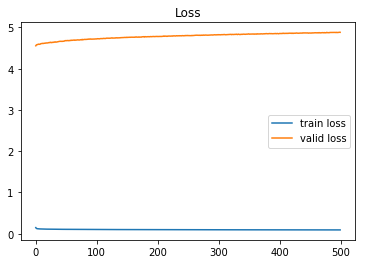

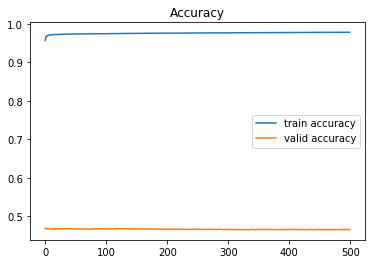

In [10]:
show_result(model_sgd)